In [1]:
%matplotlib inline
import pandas as pd
import visuals as vs
from IPython.display import display

data = pd.read_csv('clusters.csv', dtype={'with_postgresql_version': str})
print("The dataset has {} data points with {} variables each.".format(*data.shape))
print("Column names: {}".format(list(data)))

data.head()

The dataset has 1095 data points with 32 variables each.
Column names: ['cluster_name', 'attempts', 'start_ts', 'end_ts', 'failed', 'completed', 'vm_count', 'build_name', 'with_conda', 'with_conda_version', 'with_docker', 'with_docker_version', 'with_flavor', 'with_foundation', 'with_foundation_version', 'with_gemfire', 'with_gemfire_version', 'with_image', 'with_java_version', 'with_kubernetes', 'with_kubernetes_version', 'with_memcached', 'with_memcached_version', 'with_oracle', 'with_oracle_version', 'with_os_version', 'with_postgresql', 'with_postgresql_version', 'with_tibco', 'with_tibco_version', 'with_ulticom', 'with_ulticom_version']


,cluster_name,attempts,start_ts,end_ts,failed,completed,vm_count,build_name,with_conda,with_conda_version,...,with_memcached_version,with_oracle,with_oracle_version,with_os_version,with_postgresql,with_postgresql_version,with_tibco,with_tibco_version,with_ulticom,with_ulticom_version
0,kalexey.20181227174135,1,1545922452338,1545923103007,False,True,13,20181227_174049_Proj_2127259257,False,4.5.11,...,_default_,False,11.2.0,rhel7.3,False,9.5,False,8.4.5,False,_default_
1,sdmitry.20181128184423,1,1543421316335,1543421667461,False,True,1,20181128_183651_Proj_1735463230,False,4.5.11,...,_default_,True,11.2.0,rhel7.4,False,9.5,False,8.4.5,False,_default_
2,igarus.20181221190350,2,1545408262310,1545409537436,False,True,14,20181220_115814_Proj_2696985,False,4.5.11,...,_default_,False,11.2.0,rhel7.4,False,9.5,False,8.4.5,True,9s65
3,sdmitry.20181211190002,1,1544544132560,1544544935177,False,True,9,20181211_161447_Proj_2631643,False,4.5.11,...,_default_,True,11.2.0,rhel7.4,False,9.5,False,8.4.5,False,_default_
4,abondar.20181207141530,1,1544181372440,1544181831985,False,True,4,20181207_083303_Proj_1027219150,False,4.5.11,...,_default_,True,11.2.0,rhel7.3,False,9.5,False,8.4.5,False,_default_


TODO: describe each column

In [2]:
data['seconds'] = (data.end_ts - data.start_ts)/1000
data = data.drop(columns=['end_ts', 'start_ts'])

In [3]:
display(data.describe())

,attempts,vm_count,seconds
count,1095.000000,1095.000000,1095.000000
mean,1.296804,5.042009,593.556932
std,1.198162,5.017708,372.183086
min,1.000000,1.000000,50.761000
25%,1.000000,1.000000,353.266000
50%,1.000000,3.000000,499.470000
75%,1.000000,9.000000,729.423000
max,10.000000,26.000000,4539.504000


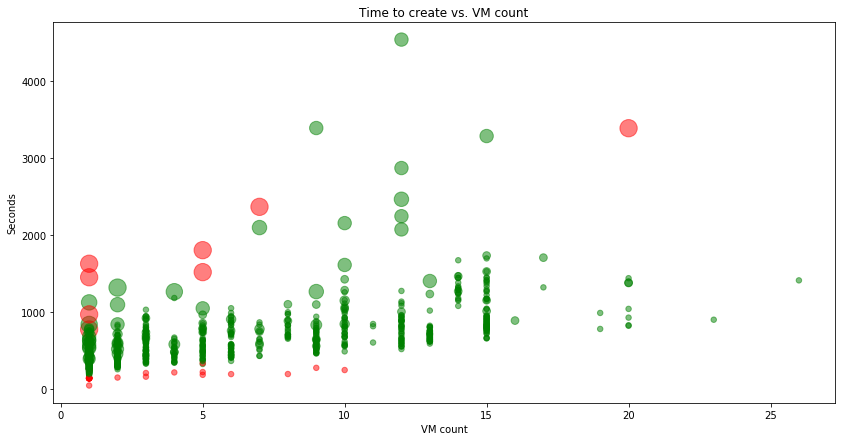

In [4]:
vs.plot1(data)

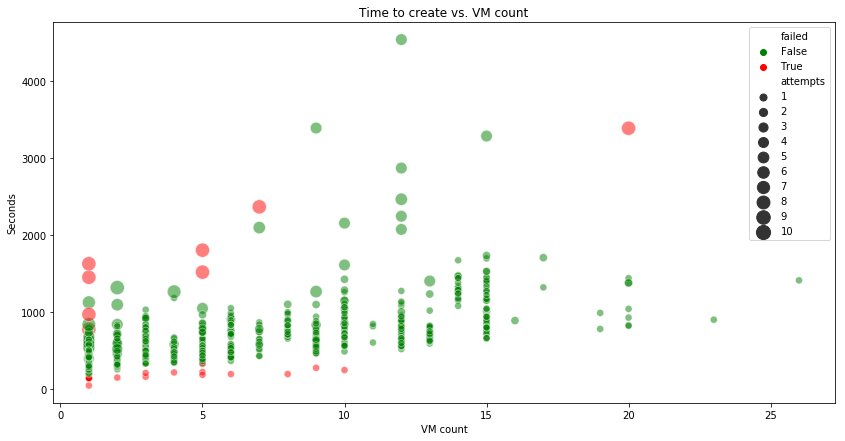

In [5]:
vs.plot3(data)


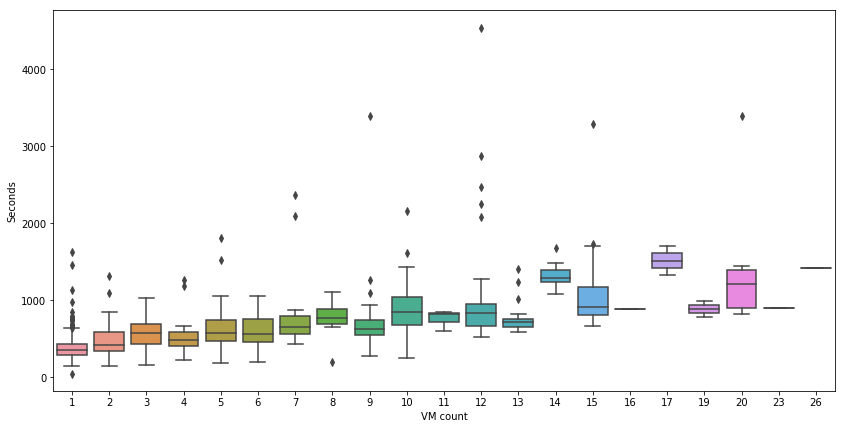

In [6]:
vs.plot2(data)

In [7]:
bad_data = data[(data.attempts > 5) | (data.failed)]
# bad_data = data[(data.failed)]

bad_data_count = bad_data.shape[0]
bad_data_percent = round(bad_data_count * 100 / data.shape[0], 2)
print("Found {} bad data points, {}% of the whole dataset".format(bad_data_count, bad_data_percent))
display(bad_data[['cluster_name', 'attempts', 'failed', 'vm_count', 'seconds']].head(10))

Found 60 bad data points, 5.48% of the whole dataset


,cluster_name,attempts,failed,vm_count,seconds
6,maximo.20181130172742,1,True,4,220.334
25,sdmitry.20190114185031,6,False,12,2076.067
29,marsels.20181128142358,1,True,5,225.501
35,marsels.20181204093910,10,True,1,1455.075
44,sdmitry.20190114185047,6,False,12,2872.506
70,edrojdina.20181206140532,1,True,1,144.247
71,nikolayk.20181225093155,10,True,1,1631.033
88,abondar.20190204124856,6,False,10,1614.971
135,marsels.20181128202554,10,True,5,1521.896
143,maximo.20190109104914,8,False,1,1129.215


We have 1035 good data points now, 94.52% of the original dataset


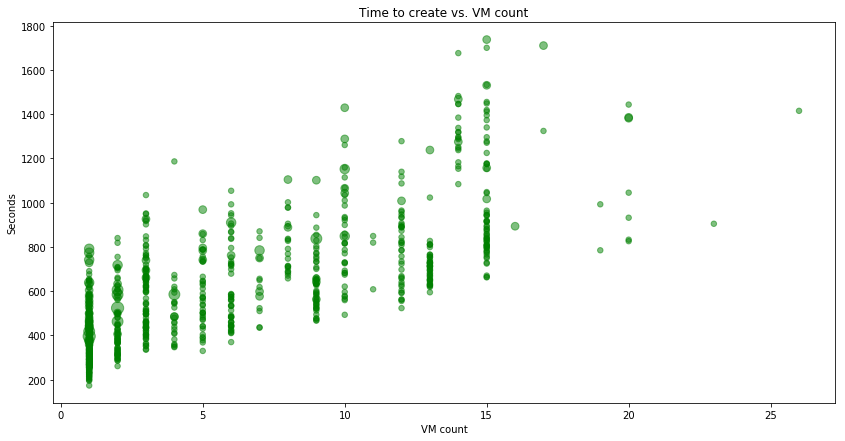

In [8]:
good_data = data.drop(bad_data.index)
good_data_count = good_data.shape[0]
good_data_percent = round(good_data_count * 100 / data.shape[0], 2)
print("We have {} good data points now, {}% of the original dataset".format(good_data_count, good_data_percent))
vs.plot1(good_data)

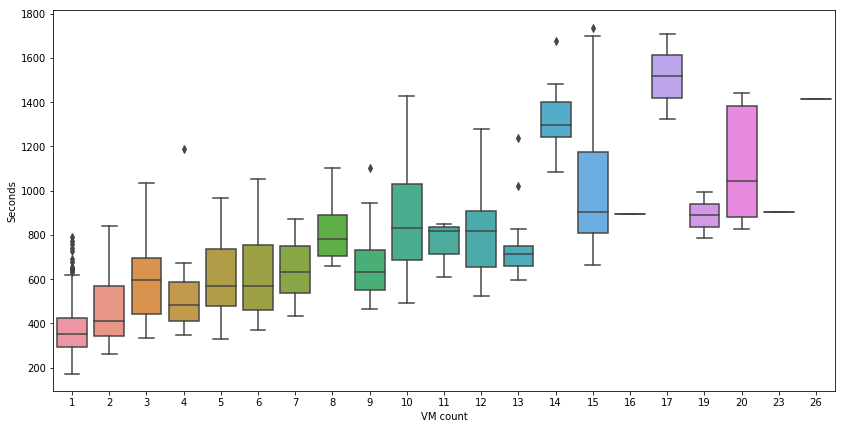

In [9]:
vs.plot2(good_data)

In [10]:
software = ['conda', 'docker', 'foundation', 'gemfire', 'kubernetes', 'memcached', 'oracle', 'postgresql', 'tibco', 'ulticom']

# df = good_data.copy()
# for item in software:
#     ind_col = "with_{}".format(item)
#     ver_col = "with_{}_version".format(item)
#     df.loc[df[ind_col] == False, ver_col] = '0'
#     df = df.drop(columns=ind_col)

df = good_data.copy()
for item in software:
    ind_col = "with_{}".format(item)
    ver_col = "with_{}_version".format(item)
#     df.loc[df[ind_col] == False, ver_col] = '0'
    df = df.drop(columns=ver_col)
    

df['project'] = df['build_name'].str[16:]
df = df.drop(columns=['cluster_name', 'attempts', 'failed', 'completed', 'build_name'])
display(df.head(10))


,vm_count,with_conda,with_docker,with_flavor,with_foundation,with_gemfire,with_image,with_java_version,with_kubernetes,with_memcached,with_oracle,with_os_version,with_postgresql,with_tibco,with_ulticom,seconds,project
0,13,False,False,testfarm-flavor-2-16-21,False,False,_default_,1.7.0_51,False,False,False,rhel7.3,False,False,False,650.669,Proj_2127259257
1,1,False,False,testfarm-flavor-2-16-21,False,True,_default_,1.8.0_131,False,False,True,rhel7.4,False,False,False,351.126,Proj_1735463230
2,14,False,False,testfarm-flavor-2-16-21,False,True,_default_,1.8.0_152,False,False,False,rhel7.4,False,False,True,1275.126,Proj_2696985
3,9,False,False,testfarm-flavor-2-16-21,True,True,_default_,1.8.0_152,False,False,True,rhel7.4,False,False,False,802.617,Proj_2631643
4,4,False,False,testfarm-flavor-2-16-21,False,True,_default_,1.7.0_51,False,False,True,rhel7.3,False,False,False,459.545,Proj_1027219150
5,13,False,False,testfarm-flavor-2-16-21,False,False,_default_,1.7.0_51,False,False,False,rhel7.3,False,False,False,594.720,Proj_2127259257
7,3,False,False,testfarm-flavor-2-16-21,True,True,_default_,1.7.0_51,False,False,True,rhel7.3,False,False,False,360.446,Proj_1027219150
8,1,False,False,testfarm-flavor-2-16-21,True,False,_default_,1.8.0_74,False,False,True,rhel7.3,False,False,False,404.290,Proj_73134446
9,15,False,False,testfarm-flavor-2-16-21,False,False,_default_,1.8.0_121,False,False,False,rhel7.4,False,False,False,1016.868,Proj_189425416
10,2,False,False,testfarm-flavor-2-16-21,False,False,_default_,1.8.0_74,False,False,False,rhel7.3,False,False,False,285.922,Proj_73134446


In [11]:
targets = df['seconds']
features = df.drop(columns='seconds')

# one-hot encode categorical features
features = pd.get_dummies(features)
display(features.columns.values)
display(features.head(10))



array(['vm_count', 'with_conda', 'with_docker', 'with_foundation',
       'with_gemfire', 'with_kubernetes', 'with_memcached', 'with_oracle',
       'with_postgresql', 'with_tibco', 'with_ulticom',
       'with_flavor_testfarm-flavor-2-16-21', 'with_image__default_',
       'with_java_version_1.7.0_51', 'with_java_version_1.8.0_121',
       'with_java_version_1.8.0_131', 'with_java_version_1.8.0_152',
       'with_java_version_1.8.0_74', 'with_os_version_rhel6.9',
       'with_os_version_rhel7.3', 'with_os_version_rhel7.4',
       'project_Proj_1027219150', 'project_Proj_116590881',
       'project_Proj_1324991066', 'project_Proj_1542422003',
       'project_Proj_1735463230', 'project_Proj_186599325',
       'project_Proj_1880126601', 'project_Proj_189425416',
       'project_Proj_1971436115', 'project_Proj_1992464921',
       'project_Proj_2127259257', 'project_Proj_2409',
       'project_Proj_2631643', 'project_Proj_2696985',
       'project_Proj_468405252', 'project_Proj_69493',
   

,vm_count,with_conda,with_docker,with_foundation,with_gemfire,with_kubernetes,with_memcached,with_oracle,with_postgresql,with_tibco,...,project_Proj_1971436115,project_Proj_1992464921,project_Proj_2127259257,project_Proj_2409,project_Proj_2631643,project_Proj_2696985,project_Proj_468405252,project_Proj_69493,project_Proj_73134446,project_Proj_76409969
0,13,False,False,False,False,False,False,False,False,False,...,0,0,1,0,0,0,0,0,0,0
1,1,False,False,False,True,False,False,True,False,False,...,0,0,0,0,0,0,0,0,0,0
2,14,False,False,False,True,False,False,False,False,False,...,0,0,0,0,0,1,0,0,0,0
3,9,False,False,True,True,False,False,True,False,False,...,0,0,0,0,1,0,0,0,0,0
4,4,False,False,False,True,False,False,True,False,False,...,0,0,0,0,0,0,0,0,0,0
5,13,False,False,False,False,False,False,False,False,False,...,0,0,1,0,0,0,0,0,0,0
7,3,False,False,True,True,False,False,True,False,False,...,0,0,0,0,0,0,0,0,0,0
8,1,False,False,True,False,False,False,True,False,False,...,0,0,0,0,0,0,0,0,1,0
9,15,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
10,2,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,1,0


In [12]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42, shuffle=True)


In [13]:
class BenchmarkModel():
    def __init__(self, feat='vm_count'):
        self.feat = feat

    def fit(self, X, y):
        df = pd.concat([X, pd.Series(y, name='y')], axis=1)
        groupby = df['y'].groupby(df[self.feat])
        mean = pd.DataFrame(groupby.mean())
        
        ## we may not get target data for some values of feat, 
        ## so let's interpolate them
        mean = mean.reindex(pd.Index(range(1,27), name=self.feat))
        mean = mean.interpolate()
        
        self.mean = mean
        return self
    
    def predict(self, X):
        df = pd.merge(X, self.mean, on=self.feat, how='left')
        return df['y']

    def score(self, X, y):
        y_pred = self.predict(X)
        from sklearn.metrics import r2_score
        return r2_score(y, y_pred)

bm = BenchmarkModel().fit(X_train, y_train)
print("Benchmark R^2 score: {:.4f}".format(bm.score(X_test, y_test)))


Benchmark R^2 score: 0.7182


In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, RANSACRegressor, HuberRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor

regressors = [
    DecisionTreeRegressor(),
    LinearRegression(), 
    RANSACRegressor(), 
    HuberRegressor(),
    AdaBoostRegressor(), 
    RandomForestRegressor(), 
    GradientBoostingRegressor(),
]

for reg in regressors:
    name = type(reg).__name__
    score = reg.fit(X_train, y_train).score(X_test, y_test)
    print("{:25} : {:.4f}".format(name, score))


DecisionTreeRegressor     : 0.8134
LinearRegression          : 0.8445
RANSACRegressor           : 0.8152
HuberRegressor            : 0.8382
AdaBoostRegressor         : 0.7800
RandomForestRegressor     : 0.8331
GradientBoostingRegressor : 0.8537


In [15]:
reg = GradientBoostingRegressor().fit(X_train, y_train)
y_test_pred = reg.predict(X_test)
importance = pd.DataFrame({'feature': X_test.columns, 'importance': reg.feature_importances_})
importance.sort_values(by='importance', ascending=False, inplace=True)
display(importance.head(15))

,feature,importance
0,vm_count,0.434496
10,with_ulticom,0.057635
16,with_java_version_1.8.0_152,0.047748
37,project_Proj_73134446,0.044196
2,with_docker,0.042753
5,with_kubernetes,0.040520
7,with_oracle,0.033100
36,project_Proj_69493,0.032915
4,with_gemfire,0.029064
22,project_Proj_116590881,0.022406


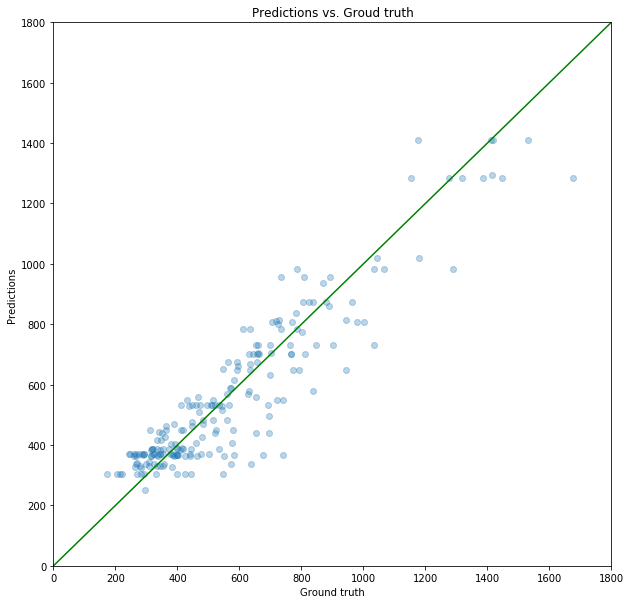

In [16]:
import numpy as np
plt.figure(figsize=(10,10))
plt.title("Predictions vs. Groud truth")
plt.xlabel("Ground truth")
plt.ylabel("Predictions")
plt.scatter(x=y_test, y=y_test_pred, marker='o', alpha=.3)
plt.plot([0,1800], [0,1800], color = 'green')
plt.xlim(0, 1800), plt.ylim(0, 1800)
plt.show()
